In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

name='177_right.jpeg'
image = cv.imread(name)
grayscale = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
ret,thresholded = cv.threshold(grayscale, 0, 255, cv.THRESH_OTSU)
bbox = cv.boundingRect(thresholded)
x, y, w, h = bbox
foreground = image[y:y+h, x:x+w]
resized = cv.resize(foreground, (512,512),interpolation = cv.INTER_AREA)
cv.imwrite(name,resized)

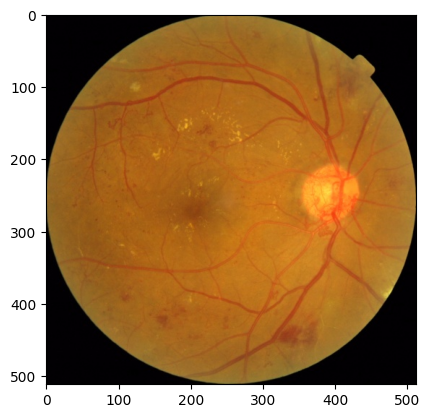

In [76]:
img = cv.imread('2.jpg')
img_convert = cv.cvtColor(img, cv.COLOR_BGR2RGB) #defining image to experiment with number of clusters
plt.imshow(img_convert)
# checkYellow(img)

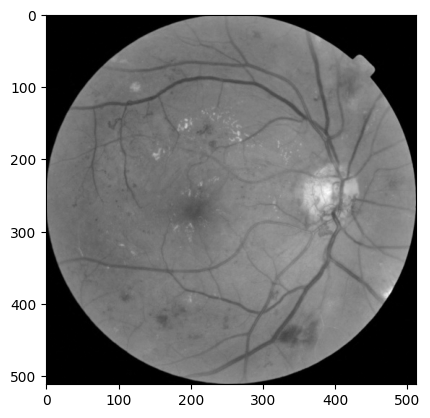

In [77]:

img = img[:,:,1]
cv.imwrite('green.jpg',img)

img_width,img_height =img.shape

plt.imshow(img,cmap="gray")

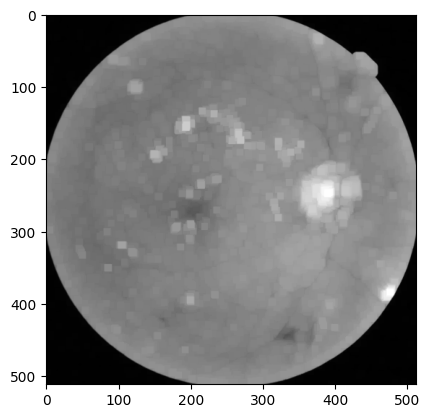

In [78]:
# Taking a matrix of size 5 as the kernel
kernel = np.ones((3, 3), np.uint8)
# dilate the thresholed image
img_dilation = cv.dilate(img, kernel, iterations=4)

plt.imshow(img_dilation,cmap="gray")

In [79]:
Z = img.reshape((-1))
# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)


## Blood vessel  localization

In [80]:

K = 7
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_PP_CENTERS )
# Now convert back into uint8, and make original image
center = np.uint8(center)


c = center.flatten()
sortedIndexes = sorted(range(len(c)), key = lambda sub: c[sub])
# for index in sortedIndexes:
flat = label.flatten()
# print(minindex)
minindex = sortedIndexes[0]
index = sortedIndexes[1]
super_threshold_indices = flat != index
flat[super_threshold_indices] = minindex
res = center[flat]
res2 = res.reshape((img.shape))


# Taking a matrix of size 5 as the kernel
# kernel = np.ones((10, 10), np.uint8)
# dilate the thresholed image
# img_dilation = cv.dilate(thresholded, kernel, iterations=1)
cv.imwrite(str(c[index])+'.jpg',res2)
ret,thresholded = cv.threshold(res2, 0, 255, cv.THRESH_OTSU)
cv.imwrite('thresholded.jpg',thresholded)


True

In [84]:
output = cv.connectedComponentsWithStats(thresholded, 4, cv.CV_32S)
(numLabels, labels, stats, centroids) = output

# initialize an output mask to store all objects
mask = np.zeros(img.shape, dtype="uint8")

In [85]:
# loop over the number of unique connected component labels, skipping
# over the first label (as label zero is the background)
for i in range(1, numLabels):
    # extract the connected component statistics for the current
    # label
    x = stats[i, cv.CC_STAT_LEFT]
    y = stats[i, cv.CC_STAT_TOP]
    w = stats[i, cv.CC_STAT_WIDTH]
    h = stats[i, cv.CC_STAT_HEIGHT]
    area = stats[i, cv.CC_STAT_AREA]
    # ensure the width, height, and area are all neither too small
    # nor too big
    keepWidth = w > 5 and w < 50
    keepHeight = h > 45 and h < 65
    keepArea = area < 190 
    lineFilter = area > w*h/3
    hlineFilter = w < h*5
    vlineFilter = h < w*5

    # ensure the connected component we are examining passes all
    # three tests
    if all(( keepArea,lineFilter,hlineFilter,vlineFilter)):
        # construct a mask for the current connected component and
        # then take the bitwise OR with the mask
        # print("[INFO] keeping connected component '{}'".format(i))
        componentMask = (labels == i).astype("uint8") * 255
        mask = cv.bitwise_or(mask, componentMask)
        # cv.imwrite('area-'+str(area)+'.jpg',componentMask)


In [86]:
cv.imwrite('finalmask.jpg',mask)

True